<a href="https://colab.research.google.com/github/ollieworld/public/blob/main/%EA%B3%A8%ED%94%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# @title Setup
from google.colab import auth
from google.cloud import bigquery
from google.colab import data_table

project = 'smart-ruler-304409' # Project ID inserted based on the query results selected to explore
location = 'asia-northeast3' # Location inserted based on the query results selected to explore
client = bigquery.Client(project=project, location=location)
data_table.enable_dataframe_formatter()
auth.authenticate_user()

## Reference SQL syntax from the original job
Use the ```jobs.query```
[method](https://cloud.google.com/bigquery/docs/reference/rest/v2/jobs/query) to
return the SQL syntax from the job. This can be copied from the output cell
below to edit the query now or in the future. Alternatively, you can use
[this link](https://console.cloud.google.com/bigquery?j=smart-ruler-304409:asia-northeast3:bquxjob_7b480203_1869f822ce5)
back to BigQuery to edit the query within the BigQuery user interface.

In [ ]:
# Running this code will display the query used to generate your previous job

job = client.get_job('bquxjob_7b480203_1869f822ce5') # Job ID inserted based on the query results selected to explore
print(job.query)

---★골프 장기분석

---1)분기별 골프 구매 지표
select YR
      ,QRTR
     --, prdt_di_cd, prdt_di_nm
     --, prdt_cat_cd, prdt_cat_nm
     , prdt_gcode_cd, prdt_gcode_nm
     , prdt_mcode_cd, prdt_mcode_nm
     , count(distinct cust_id) cust
     , sum(case when  a.TAXT_TAXPT_DIVCD='1' then (sale_amt-enuri_amt) / 1.1 
        else(sale_amt-enuri_amt) end) as ramt
     , count(distinct cust_id||bsn_dt) visit
     ,count(distinct cust_id||bsn_dt||a.prdt_cd) prdt
from `smart-ruler-304409.cds_core.TB_DW_RCIPT_DETAIL` A
inner join `smart-ruler-304409.team_targeting.cat_all` B on a.prdt_cd = b.prdt_cd
left join cds_core.TB_DW_DT_MASTR C ON A.BSN_DT = C.YMD
where aflco_cd = '001' 
and biztp_cd in ('10','1100')  --★21년포함일때
--and str_cd between '1000' and '1167'
and ((biztp_cd = '10' and str_cd in (select distinct str_cd_old from `smart-ruler-304409.team_tgt_biz.de_same_str` where yr = 2023 order by 1))  --2021년 --★21년포함일때
 or  (biztp_Cd = '1100' and str_cd in (select distinct str_cd from `smart-ruler-304409.

# Result set loaded from BigQuery job as a DataFrame
Query results are referenced from the Job ID ran from BigQuery and the query
does not need to be re-run to explore results. The ```to_dataframe```
[method](https://googleapis.dev/python/bigquery/latest/generated/google.cloud.bigquery.job.QueryJob.html#google.cloud.bigquery.job.QueryJob.to_dataframe)
downloads the results to a Pandas DataFrame by using the BigQuery Storage API.

To edit query syntax, you can do so from the BigQuery SQL editor or in the
```Optional:``` sections below.

In [ ]:
# Running this code will read results from your previous job

job = client.get_job('bquxjob_7b480203_1869f822ce5') # Job ID inserted based on the query results selected to explore
results = job.to_dataframe()
results

,YR,QRTR,prdt_gcode_cd,prdt_gcode_nm,prdt_mcode_cd,prdt_mcode_nm,cust,ramt,visit,prdt
0,2021,Q1,1664,골프,10083,골프웨어,560,16260409.090909237,587,738
1,2021,Q1,1664,골프,10516,노브랜드 골프,1748,19927400.000000208,1876,2067
2,2021,Q1,1664,골프,16980,골프클럽,5097,4100773890.909091063,5803,8272
3,2021,Q1,1664,골프,16990,골프용품,41444,1756281336.363635409,48632,72346
4,2021,Q2,1664,골프,10083,골프웨어,1912,50207745.454545375,2044,2437
5,2021,Q2,1664,골프,10516,노브랜드 골프,2957,37785463.636363950,3340,3783
6,2021,Q2,1664,골프,16980,골프클럽,6716,5299168818.181818822,7598,10797
7,2021,Q2,1664,골프,16990,골프용품,65003,3117981899.999998831,81285,124359
8,2021,Q3,1664,골프,10083,골프웨어,1526,38525909.090908987,1595,1884
9,2021,Q3,1664,골프,10516,노브랜드 골프,3566,45753245.454545875,4015,4414


## Show descriptive statistics using describe()
Use the ```pandas DataFrame.describe()```
[method](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html)
to generate descriptive statistics. Descriptive statistics include those that
summarize the central tendency, dispersion and shape of a dataset’s
distribution, excluding ```NaN``` values. You may also use other Python methods
to interact with your data.

In [ ]:
results.describe()

,cust,visit,prdt
count,36.000000,36.000000,36.000000
mean,18130.638889,21872.333333,32939.277778
std,27374.976850,33844.286115,52497.592173
min,333.000000,350.000000,439.000000
25%,1871.000000,2002.000000,2344.500000
50%,4383.500000,4886.000000,6071.000000
75%,13744.250000,15499.750000,22706.000000
max,83528.000000,103337.000000,158320.000000


In [ ]:
import seaborn as sns
sns.set()

In [ ]:
# 한글 깨짐 한글 나눔 폰트 설치
# 실행 후 런타임 전체 재실행

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf


Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 19 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats 
import matplotlib.pyplot as plt 
import seaborn as sns 
import matplotlib.patches as mpatches
import matplotlib.font_manager as fm
get_ipython().run_line_magic('matplotlib','inline')

In [ ]:
results.head()

,YR,QRTR,prdt_gcode_cd,prdt_gcode_nm,prdt_mcode_cd,prdt_mcode_nm,cust,ramt,visit,prdt
0,2021,Q1,1664,골프,10083,골프웨어,560,16260409.090909237,587,738
1,2021,Q1,1664,골프,10516,노브랜드 골프,1748,19927400.000000208,1876,2067
2,2021,Q1,1664,골프,16980,골프클럽,5097,4100773890.909091063,5803,8272
3,2021,Q1,1664,골프,16990,골프용품,41444,1756281336.363635409,48632,72346
4,2021,Q2,1664,골프,10083,골프웨어,1912,50207745.454545375,2044,2437


In [ ]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   YR             36 non-null     object
 1   QRTR           36 non-null     object
 2   prdt_gcode_cd  36 non-null     object
 3   prdt_gcode_nm  36 non-null     object
 4   prdt_mcode_cd  36 non-null     object
 5   prdt_mcode_nm  36 non-null     object
 6   cust           36 non-null     Int64 
 7   ramt           36 non-null     object
 8   visit          36 non-null     Int64 
 9   prdt           36 non-null     Int64 
dtypes: Int64(3), object(7)
memory usage: 3.0+ KB


In [ ]:
results.head()

,YR,QRTR,prdt_gcode_cd,prdt_gcode_nm,prdt_mcode_cd,prdt_mcode_nm,cust,ramt,visit,prdt
0,2021,Q1,1664,골프,10083,골프웨어,560,16260409.090909237,587,738
1,2021,Q1,1664,골프,10516,노브랜드 골프,1748,19927400.000000208,1876,2067
2,2021,Q1,1664,골프,16980,골프클럽,5097,4100773890.909091063,5803,8272
3,2021,Q1,1664,골프,16990,골프용품,41444,1756281336.363635409,48632,72346
4,2021,Q2,1664,골프,10083,골프웨어,1912,50207745.454545375,2044,2437


In [ ]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   YR             36 non-null     object
 1   QRTR           36 non-null     object
 2   prdt_gcode_cd  36 non-null     object
 3   prdt_gcode_nm  36 non-null     object
 4   prdt_mcode_cd  36 non-null     object
 5   prdt_mcode_nm  36 non-null     object
 6   cust           36 non-null     Int64 
 7   ramt           36 non-null     object
 8   visit          36 non-null     Int64 
 9   prdt           36 non-null     Int64 
dtypes: Int64(3), object(7)
memory usage: 3.0+ KB


In [ ]:
results['ramt'] = results['ramt'].astype(int)

In [ ]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   YR             36 non-null     object
 1   QRTR           36 non-null     object
 2   prdt_gcode_cd  36 non-null     object
 3   prdt_gcode_nm  36 non-null     object
 4   prdt_mcode_cd  36 non-null     object
 5   prdt_mcode_nm  36 non-null     object
 6   cust           36 non-null     Int64 
 7   ramt           36 non-null     int64 
 8   visit          36 non-null     Int64 
 9   prdt           36 non-null     Int64 
dtypes: Int64(3), int64(1), object(6)
memory usage: 3.0+ KB


In [ ]:
# 신규 열 삽입
results['atv'] = (results.ramt/results.cust) # 인당객단가
results['avg_visit'] = results['visit'] / results['cust'] # 인당방문횟수
results['avg_prdt'] = results['prdt'] / results['visit'] # 회당구매품목수

In [ ]:
results

,YR,QRTR,prdt_gcode_cd,prdt_gcode_nm,prdt_mcode_cd,prdt_mcode_nm,cust,ramt,visit,prdt,atv,avg_visit,avg_prdt
0,2021,Q1,1664,골프,10083,골프웨어,560,16260409,587,738,29036.444643,1.048214,1.25724
1,2021,Q1,1664,골프,10516,노브랜드 골프,1748,19927400,1876,2067,11400.114416,1.073227,1.101812
2,2021,Q1,1664,골프,16980,골프클럽,5097,4100773890,5803,8272,804546.574456,1.138513,1.42547
3,2021,Q1,1664,골프,16990,골프용품,41444,1756281336,48632,72346,42377.215906,1.173439,1.487621
4,2021,Q2,1664,골프,10083,골프웨어,1912,50207745,2044,2437,26259.280858,1.069038,1.19227
5,2021,Q2,1664,골프,10516,노브랜드 골프,2957,37785463,3340,3783,12778.310112,1.129523,1.132635
6,2021,Q2,1664,골프,16980,골프클럽,6716,5299168818,7598,10797,789036.452948,1.131328,1.421032
7,2021,Q2,1664,골프,16990,골프용품,65003,3117981899,81285,124359,47966.738443,1.250481,1.529913
8,2021,Q3,1664,골프,10083,골프웨어,1526,38525909,1595,1884,25246.336173,1.045216,1.181191
9,2021,Q3,1664,골프,10516,노브랜드 골프,3566,45753245,4015,4414,12830.410824,1.125911,1.099377


In [ ]:
#2023년 제거
results = results[results['YR'] != '2023']

In [ ]:
results

,YR,QRTR,prdt_gcode_cd,prdt_gcode_nm,prdt_mcode_cd,prdt_mcode_nm,cust,ramt,visit,prdt,atv,avg_visit,avg_prdt
0,2021,Q1,1664,골프,10083,골프웨어,560,16260409,587,738,29036.444643,1.048214,1.25724
1,2021,Q1,1664,골프,10516,노브랜드 골프,1748,19927400,1876,2067,11400.114416,1.073227,1.101812
2,2021,Q1,1664,골프,16980,골프클럽,5097,4100773890,5803,8272,804546.574456,1.138513,1.42547
3,2021,Q1,1664,골프,16990,골프용품,41444,1756281336,48632,72346,42377.215906,1.173439,1.487621
4,2021,Q2,1664,골프,10083,골프웨어,1912,50207745,2044,2437,26259.280858,1.069038,1.19227
5,2021,Q2,1664,골프,10516,노브랜드 골프,2957,37785463,3340,3783,12778.310112,1.129523,1.132635
6,2021,Q2,1664,골프,16980,골프클럽,6716,5299168818,7598,10797,789036.452948,1.131328,1.421032
7,2021,Q2,1664,골프,16990,골프용품,65003,3117981899,81285,124359,47966.738443,1.250481,1.529913
8,2021,Q3,1664,골프,10083,골프웨어,1526,38525909,1595,1884,25246.336173,1.045216,1.181191
9,2021,Q3,1664,골프,10516,노브랜드 골프,3566,45753245,4015,4414,12830.410824,1.125911,1.099377


# Pivoting

In [ ]:
df = results.pivot(index = ['prdt_mcode_nm'], columns = ['YR', 'QRTR'], values = ['cust', 'ramt', 'atv', 'avg_visit', 'avg_prdt'])
df

cust                                                   \
YR              2021                        2022                        
QRTR              Q1     Q2     Q3     Q4     Q1     Q2     Q3     Q4   
prdt_mcode_nm                                                           
골프용품           41444  65003  73442  62336  59680  81285  83528  64903   
골프웨어             560   1912   1526    980    539   1947   1559    897   
골프클럽            5097   6716   7390   4944   5796   6381   5903   4501   
노브랜드 골프         1748   2957   3566   2169   2946   4266   5612   3722   

                     ramt              ... avg_visit            avg_prdt  \
YR                   2021              ...      2022                2021   
QRTR                   Q1          Q2  ...        Q3        Q4        Q1   
prdt_mcode_nm                          ...                                 
골프용품           1756281336  3117981899  ...  1.237154  1.210175  1.487621   
골프웨어             16260409    50207745  ...  1.043618  1.079153   1.25724   
골프클럽           4100773890  5299168818  ...  1.117906  1.122862   1.42547   
노브랜드 골프          19927400    37785463  ...  1.119209  1.094573  1.101812   

                                                                           \
YR                                               2022                       
QRTR                 Q2        Q3        Q4        Q1        Q2        Q3   
prdt_mcode_nm                                                               
골프용품           1.529913  1.558287  1.506799  1.592946  1.563423  1.529317   
골프웨어            1.19227  1.181191  1.256932   1.24525  1.195017  1.172096   
골프클럽           1.421032   1.48997  1.463784  1.493045  1.441222  1.412184   
노브랜드 골프        1.132635  1.099377   1.07907  1.081384   1.09326  1.111925   

                         
YR                       
QRTR                 Q4  
prdt_mcode_nm            
골프용품           1.522866  
골프웨어            1.26343  
골프클럽            1.41947  
노브랜드 골프        1.091802  

[4 rows x 40 columns]

In [ ]:
df = results.pivot(index = ['YR', 'QRTR'], columns = ['prdt_mcode_nm'], values = ['cust'])
df

cust                    
prdt_mcode_nm   골프용품  골프웨어  골프클럽 노브랜드 골프
YR   QRTR                               
2021 Q1        41444   560  5097    1748
     Q2        65003  1912  6716    2957
     Q3        73442  1526  7390    3566
     Q4        62336   980  4944    2169
2022 Q1        59680   539  5796    2946
     Q2        81285  1947  6381    4266
     Q3        83528  1559  5903    5612
     Q4        64903   897  4501    3722

In [ ]:
pip install seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
get_ipython().run_line_magic('matplotlib','inline')

#matplotlib 패키지 한글 깨짐 처리
#plt.rc('font', family='Malgun Gothic') #윈도우, 구글 콜랩
plt.rc('font', family='NanumGothic') #윈도우, 구글 콜랩
#plt.rc('font', family='AppleGothic') #맥
plt.rcParams['axes.unicode_minus'] = False #한글 폰트 사용시 마이너스 폰트 깨짐 해결

<ipython-input-22-aa60cc654824>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results['ym'] = results['YR'] + results['QRTR']


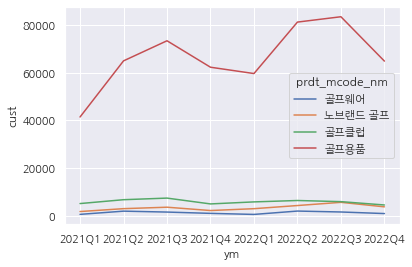

<Figure size 720x432 with 0 Axes>

In [ ]:
# Using Matplotlib:
# results.plot(kind = 'line')
# plt.title('Cust by Month and Mcode')
# plt.xlable('YM')
# plt.ylable('Cust')
# plt.show()

results['ym'] = results['YR'] + results['QRTR']


# Using Seaborn

sns.lineplot(x = 'ym', y = 'cust', hue = 'prdt_mcode_nm', data = results.reset_index())
plt.rc('font', family='NanumBarunGothic') 
plt.figure(figsize = (10,6))
plt.show()

In [ ]:
data = results.reset_index()
data

,index,YR,QRTR,prdt_gcode_cd,prdt_gcode_nm,prdt_mcode_cd,prdt_mcode_nm,cust,ramt,visit,prdt,atv,avg_visit,avg_prdt,ym
0,0,2021,Q1,1664,골프,10083,골프웨어,560,16260409,587,738,29036.444643,1.048214,1.25724,2021Q1
1,1,2021,Q1,1664,골프,10516,노브랜드 골프,1748,19927400,1876,2067,11400.114416,1.073227,1.101812,2021Q1
2,2,2021,Q1,1664,골프,16980,골프클럽,5097,4100773890,5803,8272,804546.574456,1.138513,1.42547,2021Q1
3,3,2021,Q1,1664,골프,16990,골프용품,41444,1756281336,48632,72346,42377.215906,1.173439,1.487621,2021Q1
4,4,2021,Q2,1664,골프,10083,골프웨어,1912,50207745,2044,2437,26259.280858,1.069038,1.19227,2021Q2
5,5,2021,Q2,1664,골프,10516,노브랜드 골프,2957,37785463,3340,3783,12778.310112,1.129523,1.132635,2021Q2
6,6,2021,Q2,1664,골프,16980,골프클럽,6716,5299168818,7598,10797,789036.452948,1.131328,1.421032,2021Q2
7,7,2021,Q2,1664,골프,16990,골프용품,65003,3117981899,81285,124359,47966.738443,1.250481,1.529913,2021Q2
8,8,2021,Q3,1664,골프,10083,골프웨어,1526,38525909,1595,1884,25246.336173,1.045216,1.181191,2021Q3
9,9,2021,Q3,1664,골프,10516,노브랜드 골프,3566,45753245,4015,4414,12830.410824,1.125911,1.099377,2021Q3


# Visualization

<ipython-input-24-2851e88a4575>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results['ym'] = results['YR'] + results['QRTR']


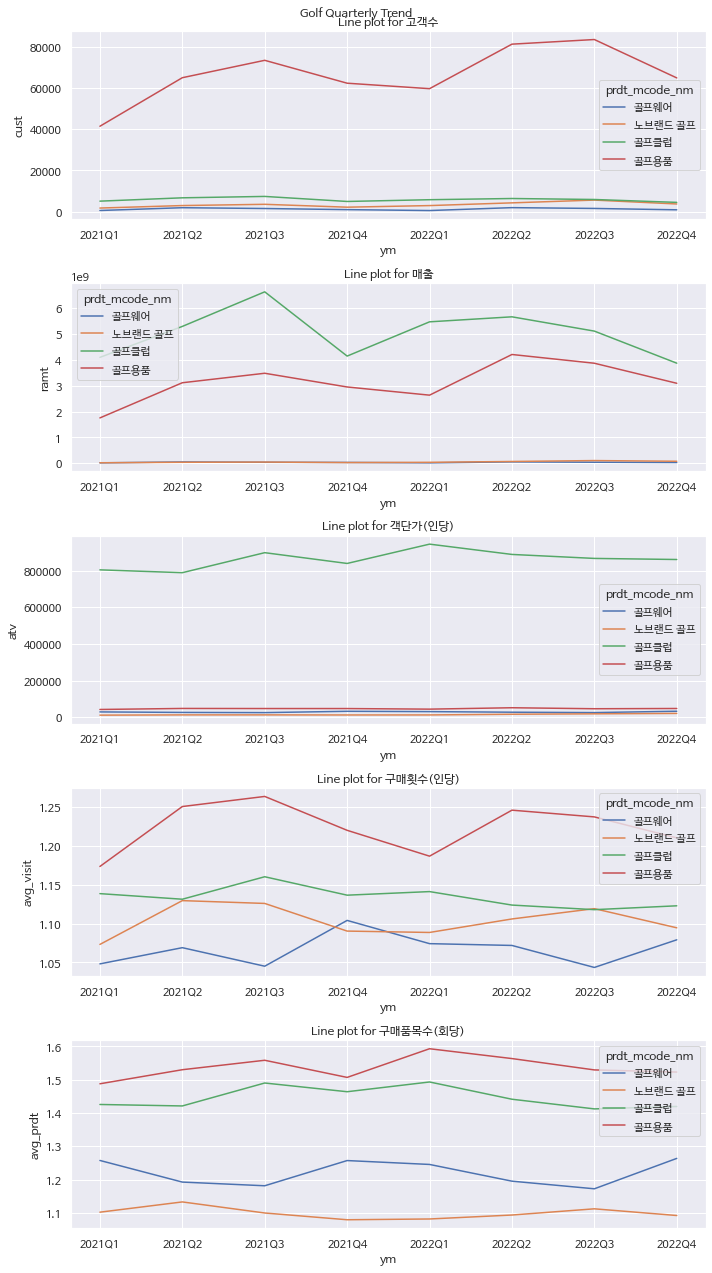

In [ ]:
columns_to_plot = ["cust","ramt","atv","avg_visit", "avg_prdt"]
results['ym'] = results['YR'] + results['QRTR']
columns_name = ['고객수','매출','객단가(인당)','구매횟수(인당)','구매품목수(회당)']

# Set the figure size
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(10, 18))

# Loop over the columns and create a plot for each one
for i, column in enumerate(columns_to_plot):
    sns.lineplot(x='ym', y=column, hue='prdt_mcode_nm', data=results, ax=axes[i])
    axes[i].set_title('Line plot for ' + columns_name[i])

# Add a common title and legend
fig.suptitle("Golf Quarterly Trend")
handles, labels = axes[0].get_legend_handles_labels()
#fig.legend(handles, labels, loc='upper right')

# Adjust the spacing
plt.tight_layout()

# Set the plot to be interactive
plt.interactive(True)

# Show the plot
# fig = plt.gcf()
# fig.canvas.toolbar_position = 'bottom'

#plt 출력
plt.show()


#이미지 저장:  plt.show() 없애고 해야됨

# from google.colab import files
# plt.savefig('Golf Trend.jpg',dpi =300)
# files.download("Golf Trend.jpg") 

In [ ]:
#grouping 
group_cat = results.groupby(['prdt_mcode_nm', 'YR', 'QRTR'])
group_cat

In [ ]:
group_cat.size().unstack()

QRTR                Q1  Q2  Q3  Q4
prdt_mcode_nm YR                  
골프용품          2021   1   1   1   1
              2022   1   1   1   1
골프웨어          2021   1   1   1   1
              2022   1   1   1   1
골프클럽          2021   1   1   1   1
              2022   1   1   1   1
노브랜드 골프       2021   1   1   1   1
              2022   1   1   1   1